In [1]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import numpy as np
import pandas as pd

# PCA for data visualization
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


import matplotlib.pyplot as plt
#from sklearn.datasets import make_blobs


In [2]:
data_file = r"Data\Cleaned\numeric_data"       
labels_file = r"Data\Cleaned\labels"       
data = joblib.load(data_file)
labels_df = joblib.load(labels_file)

In [3]:
data.head(5)

,Time from Start to Finish (seconds),Q1-Female,Q1-Male,Q1-Prefer not to say,Q1-Prefer to self-describe,Q2-18-21,Q2-22-24,Q2-25-29,Q2-30-34,Q2-35-39,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
3,718,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,731,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1142,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10,751,0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11,2028,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# create a dataframe for PCA and store only labels for now
pca_df = labels_df

print(pca_df.shape)
print(pca_df.columns)
print(pca_df.head(2))

(18593, 1)
Index(['labels'], dtype='object')
   labels
3       1
5       3


In [5]:
# normalize the time taken to complete the survey
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(data)
#, columns=['time_duration']
#print(df_time.isnull().sum().tolist())
#print(len(df_time.tolist()))


In [6]:
# elbow method on the data -- without PCA

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
#plt.xticks(np.arange(min(1), max(20)+1, 1.0))
plt.show()


"\n# calculate distortion for a range of number of cluster\ndistortions = []\nfor i in range(1, 20):\n    km = KMeans(\n        n_clusters=i, init='random',\n        n_init=10, max_iter=300,\n        tol=1e-04, random_state=0\n    )\n    km.fit(X)\n    distortions.append(km.inertia_)\n\n# plot\nfig = plt.figure(figsize=(10,8))\nplt.plot(range(1, 20), distortions, marker='o')\nplt.xlabel('Number of clusters')\nplt.ylabel('Distortion')\n#plt.xticks(np.arange(min(1), max(20)+1, 1.0))\nplt.show()\n"

# PCA

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# store results in pca_df
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
pca_df.head(5)

Explained variation per principal component: [ 0.15520446  0.0317631   0.02661058]


,labels,pca-one,pca-two,pca-three
3,1,-0.180718,-0.630786,1.289924
5,3,-0.174762,-1.152775,1.254449
6,1,2.634555,1.197032,-1.324100
10,2,1.501956,0.996913,-0.093963
11,0,0.804762,0.003263,-0.893568


In [8]:
pca_df.iloc[ : , 1: ].head()

,pca-one,pca-two,pca-three
3,-0.180718,-0.630786,1.289924
5,-0.174762,-1.152775,1.254449
6,2.634555,1.197032,-1.324100
10,1.501956,0.996913,-0.093963
11,0.804762,0.003263,-0.893568


In [9]:
# Elbow method on PCA

# elbow method
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_df.iloc[ : , 1: ].values)
    distortions.append(km.inertia_)

# plot
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
#plt.xticks(np.arange(min(1), max(20)+1, 1.0))
plt.show()


"\n# elbow method\n# calculate distortion for a range of number of cluster\ndistortions = []\nfor i in range(1, 20):\n    km = KMeans(\n        n_clusters=i, init='random',\n        n_init=10, max_iter=300,\n        tol=1e-04, random_state=0\n    )\n    km.fit(pca_df.iloc[ : , 1: ].values)\n    distortions.append(km.inertia_)\n\n# plot\nfig = plt.figure(figsize=(10,8))\nplt.plot(range(1, 20), distortions, marker='o')\nplt.xlabel('Number of clusters')\nplt.ylabel('Distortion')\n#plt.xticks(np.arange(min(1), max(20)+1, 1.0))\nplt.show()\n"

Let's check if we have clusters of job title in the PCAs 

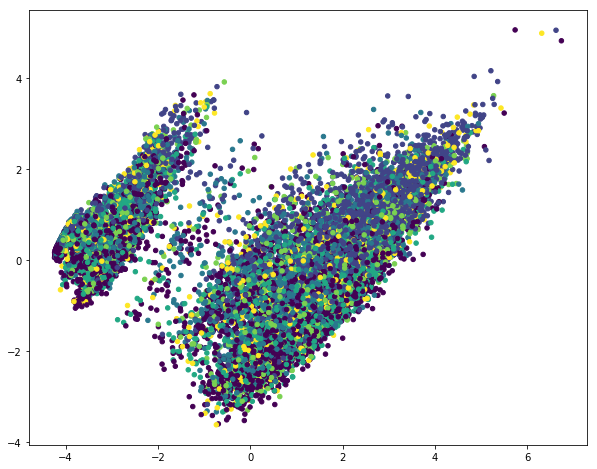

In [10]:
plt.figure(figsize=(10,8))
#print(plt.scatter(pca_df['pca-one'], pca_df['pca-two'], c=y_km_pca, s=50, cmap='viridis'))
plt.scatter(pca_df['pca-one'], pca_df['pca-two'], c=pca_df["labels"], s=20, cmap='viridis' )
#plt.legend( pca_df["labels"].value_counts().index.tolist() )



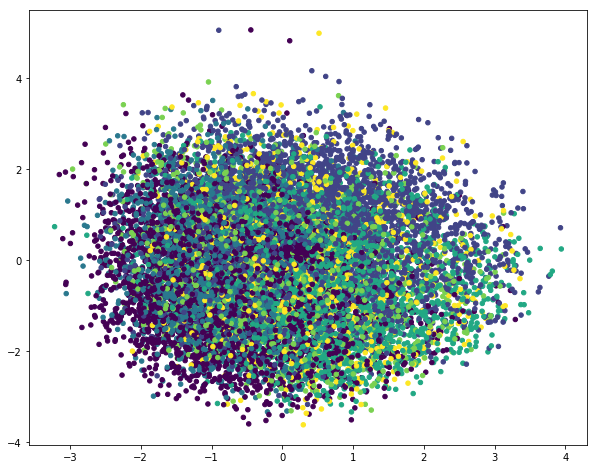

In [11]:
plt.figure(figsize=(10,8))
#plt.scatter(pca_df['pca-three'], pca_df['pca-two'], c=y_km_pca, s=50, cmap='viridis')
print(plt.scatter(pca_df['pca-three'], pca_df['pca-two'], c=pca_df["labels"], s=20, cmap='viridis'))


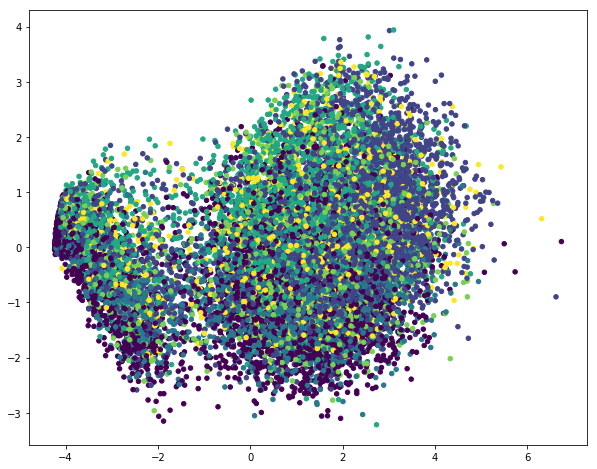

In [12]:
plt.figure(figsize=(10,8))
#plt.scatter(pca_df['pca-one'], pca_df['pca-three'], c=y_km_pca, s=10, cmap='viridis')
print(plt.scatter(pca_df['pca-one'], pca_df['pca-three'], c=pca_df["labels"], s=20, cmap='viridis'))


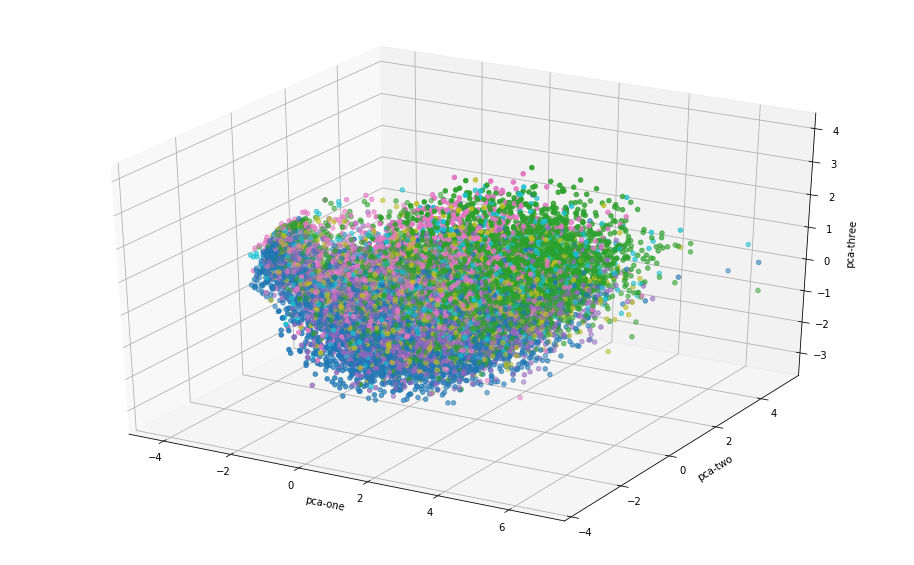

In [13]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df.loc[:,:]["pca-one"], 
    ys=pca_df.loc[:,:]["pca-two"], 
    zs=pca_df.loc[:,:]["pca-three"], 
    #c=labels.loc[rndperm,:]["labels"], 
    #c = 'r',
    c= labels_df.loc[:,:]["labels"],
    
    #legend="full",
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [14]:
print(pca_df.shape)
print(pca_df.head(5))

(18593, 4)
    labels   pca-one   pca-two  pca-three
3        1 -0.180718 -0.630786   1.289924
5        3 -0.174762 -1.152775   1.254449
6        1  2.634555  1.197032  -1.324100
10       2  1.501956  0.996913  -0.093963
11       0  0.804762  0.003263  -0.893568


# K-means on PCA

label( job-title) decided by us has not proper clusters. Hence we need to perform unsupervised clustering

In [15]:
km_pca = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# km_pca.fit(pca_df)
# y_km_pca = km_pca.predict(pca_df)
km_pca.fit(pca_df.iloc[ : , 1: ].values)
y_km_pca = km_pca.predict(pca_df.iloc[ : , 1: ].values)



In [18]:
km_pca.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>

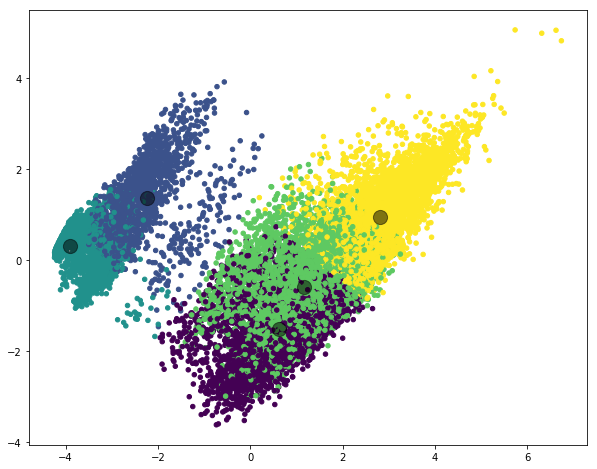

In [16]:
plt.figure(figsize=(10,8))

plt.scatter(pca_df['pca-one'], pca_df['pca-two'], c=y_km_pca, s=20, cmap='viridis')
centers = km_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: scatter() missing 1 required positional argument: 'y'

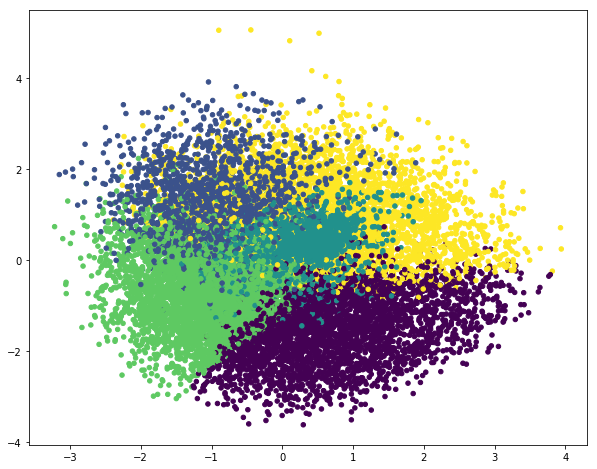

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(pca_df['pca-three'], pca_df['pca-two'], c=y_km_pca, s=20, cmap='viridis')
centers = km_pca.cluster_centers_
plt.scatter(centers[:, 0], s=200, alpha=0.5) # centers[:, 1],  c='black', ;

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(pca_df['pca-one'], pca_df['pca-three'], c=y_km_pca, s=20, cmap='viridis')
centers = km_pca.cluster_centers_
plt.scatter(centers[:, 0],  s=200, alpha=0.5); #centers[:, 1], c='black',

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df.loc[:,:]["pca-two"], 
    ys=pca_df.loc[:,:]["pca-three"], 
    zs=pca_df.loc[:,:]["pca-one"], 
    #c=labels.loc[rndperm,:]["labels"], 
    #c = 'r',
    c= y_km_pca,
    #legend="full",
    cmap='tab10'
)

ax.set_xlabel('pca2')
ax.set_ylabel('pca3')
ax.set_zlabel('pca1')
plt.show()

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df.loc[:,:]["pca-one"], 
    ys=pca_df.loc[:,:]["pca-two"], 
    zs=pca_df.loc[:,:]["pca-three"], 
    #c=labels.loc[rndperm,:]["labels"], 
    #c = 'r',
    #c= labels_df.loc[:,:]["labels"],
    c= y_km_pca,
    #legend="full",
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# explore the clusters

In [ ]:
pca_df['km_labels'] = y_km_pca
print(pca_df.shape)
print(pca_df.head())

In [ ]:
data['km_labels'] = y_km_pca
data.km_labels.value_counts()

In [ ]:
data.head(5)

In [ ]:
joblib.dump(data, r"Data\Cleaned\data_with_km_clusters")

In [ ]:
df_cluster_analysis = joblib.load(r"Data\Cleaned\cleaned_data_6_classes")       



In [ ]:
print(df_cluster_analysis.shape)
print(len(y_km_pca))

In [ ]:
df_cluster_analysis['km_labels'] = y_km_pca
df_cluster_analysis.km_labels.value_counts()

In [ ]:
joblib.dump(df_cluster_analysis, r"Data\Cleaned\df_cluster_analysis"     )